# 11 Reducción de dimensionalidad

- Concepto de reducción de dimensionalidad
- Análisis de Componentes Principales (PCA)

## Versión v.1

El notebook lo puedo modificar, esta versión es la v.1 a 08/03/2025 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]

* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Reducción de Dimensionalidad

El objetivo es reducir la cantidad de características (dimensiones) en un conjunto de datos mientras se conserve información relevante. Esto puede proporcionar varios beneficios, como la simplificación de modelos, la reducción de la complejidad computacional y la eliminación del ruido en los datos.

## Técnicas Comunes

### 1. Principal Component Analysis (PCA)

- PCA es una técnica de reducción de dimensionalidad lineal que busca encontrar las proyecciones más significativas de los datos originales en un espacio de dimensiones reducidas llamadas "componentes principales". Estos componentes capturan la mayor varianza de los datos.

### 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

- t-SNE es una técnica no lineal que se utiliza principalmente para la visualización de datos en dimensiones bajas. Convierte las similitudes entre puntos en probabilidades y busca representar puntos similares cercanos en el espacio de dimensiones reducidas.

### 3. Linear Discriminant Analysis (LDA)

- LDA es una técnica de reducción de dimensionalidad supervisada que busca maximizar la separación entre clases mientras reduce la dimensionalidad. Es útil en problemas de clasificación.

### 4. Autoencoders

- Los autoencoders son redes neuronales que pueden aprender automáticamente una representación de baja dimensión de los datos.

## Beneficios

- Reducción de la complejidad computacional.
- Menor riesgo de sobreajuste.
- Mejora en la visualización y comprensión de datos.
- Eliminación de características irrelevantes o redundantes.
- Mejora en la eficiencia de entrenamiento de modelos de aprendizaje automático.

## Consideraciones

- La elección de la técnica de reducción de dimensionalidad depende del problema y los datos específicos.
- Es importante evaluar el impacto en el rendimiento del modelo después de la reducción de dimensionalidad.



# Primer problema a considerar

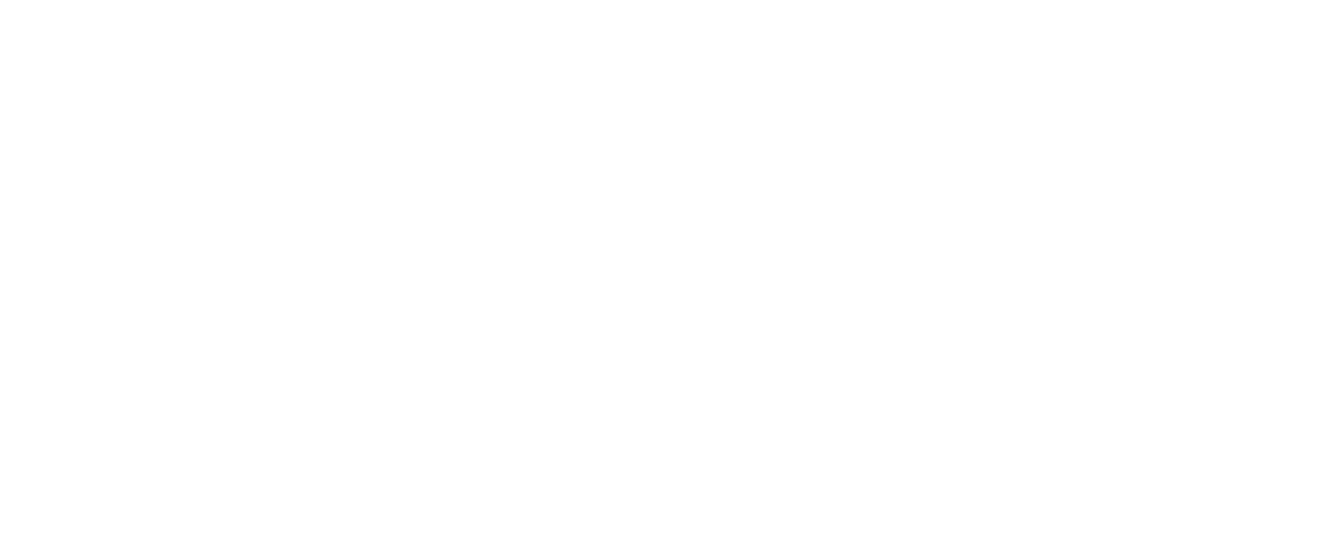

In [ ]:
import numpy as np
import plotly.express as px
from sklearn.datasets import make_blobs

# Create three-dimensional blobs
n_samples = 100
n_features = 3
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame({'X': X[:, 0], 'Y': X[:, 1], 'Z': X[:, 2], 'Cluster': y})

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Cluster', title='Scatter Plot')
fig.update_layout(scene=dict(aspectmode='cube'))

# Show the plot
fig.show()


## Proyecciones de puntos en un vector

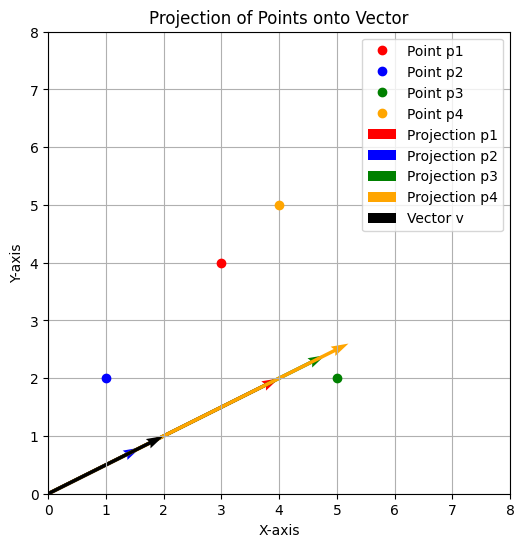

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vector v as a numpy array
v = np.array([2, 1])  # Example vector

# Define four points as numpy arrays
points = [
    np.array([3, 4]),   # Point p1
    np.array([1, 2]),   # Point p2
    np.array([5, 2]),   # Point p3
    np.array([4, 5])    # Point p4
]

color = ["red", "blue", "green", "orange"]

# Calculate the projection of each point onto v and store them in a list
projections = []
for p in points:
    dot_product = np.dot(p, v)
    v_dot_v = np.dot(v, v)
    projection = (dot_product / v_dot_v) * v
    projections.append(projection)

# Create a plot to visualize the vector v, points, and their projections
plt.figure(figsize=(8, 6))

# Plot points
for i, p in enumerate(points):
    plt.plot(p[0], p[1],  'o', color=color[i], label=f'Point p{i+1}')

# Plot the projections
for i, projection in enumerate(projections):
    plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color=color[i], label=f'Projection p{i+1}')

# Plot vector v
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black', label='Vector v')

# Set axis limits
plt.xlim(0, 8)
plt.ylim(0, 8)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Projection of Points onto Vector')
plt.show()

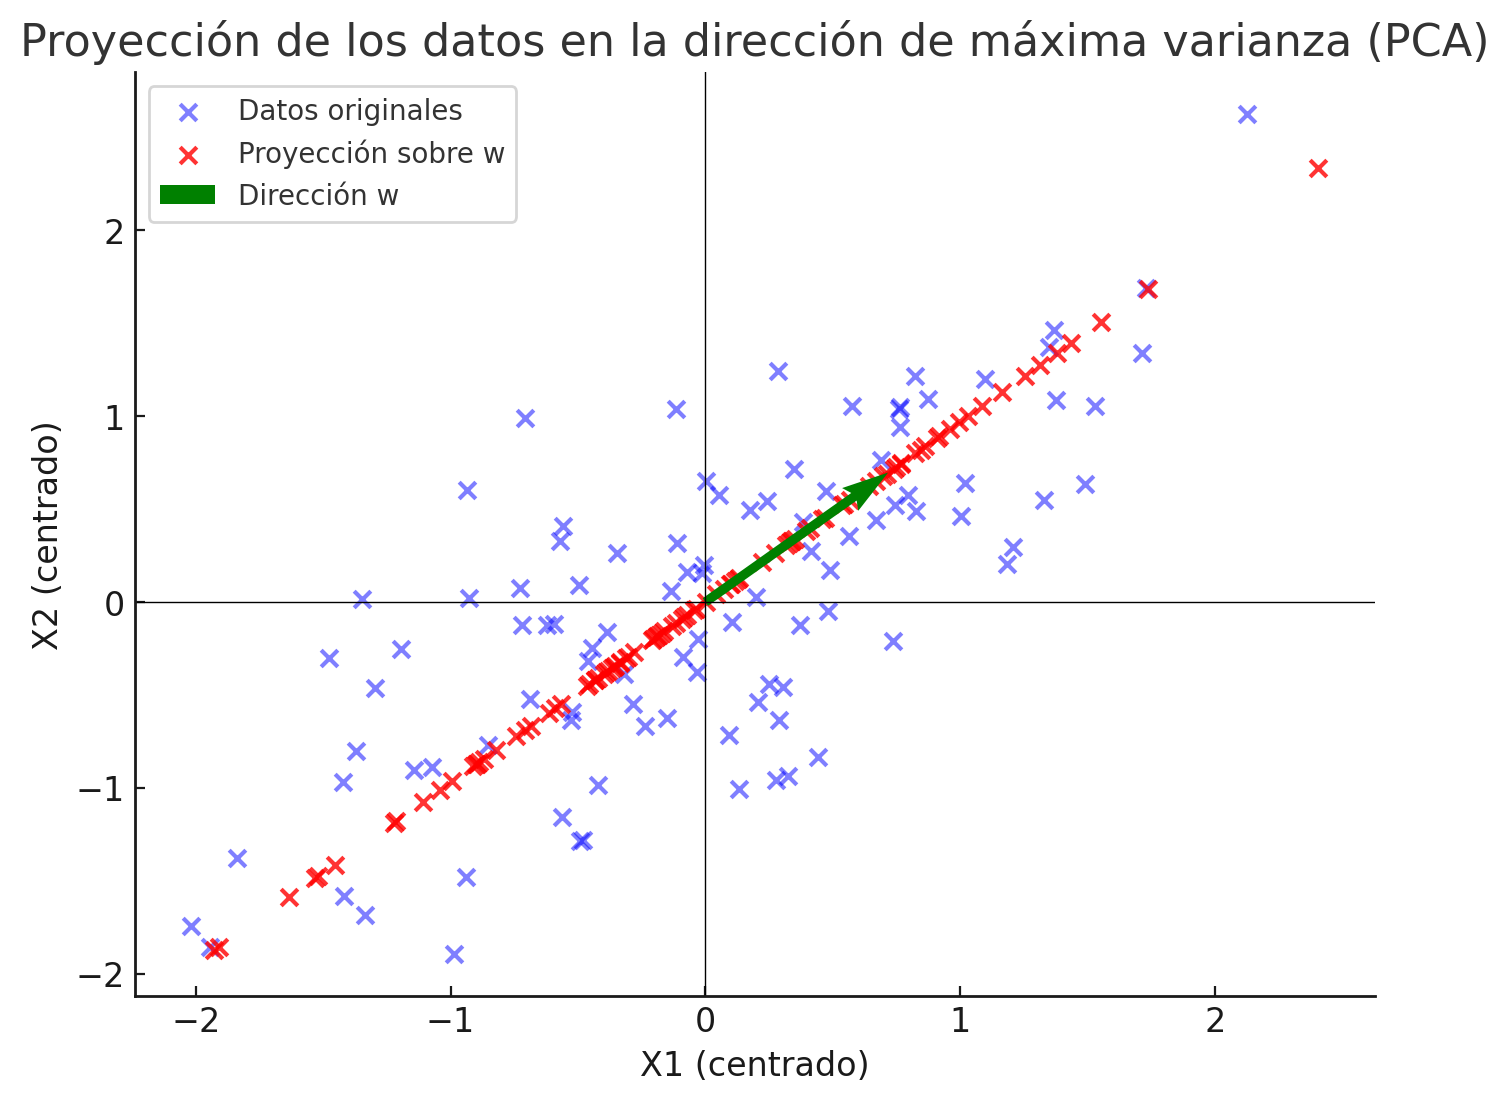

## Qué queremos?

Conseguir la proyección $\mathbf{w}$ que maximice la varianza de las proyecciones y minimice el error de proyección

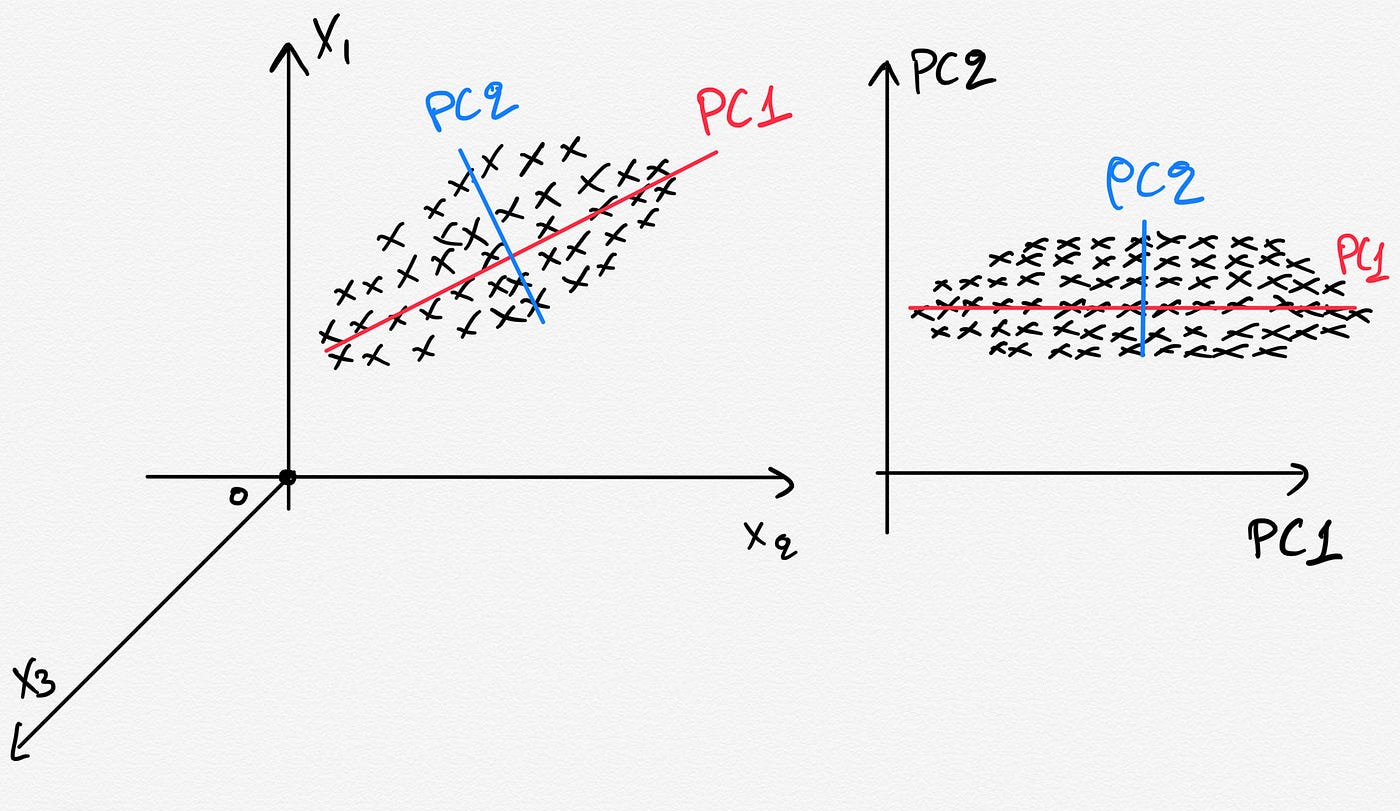

### [Definición preliminar] Autovectores y autovalores

Un autovector de una matriz $\mathbf{C}$ es, por definición, cualquier vector $\mathbf{v}$ tal que $$\mathbf{C v}=\lambda \mathbf{v}$$ y decimos que $\lambda$ es el autovalor asociado a $\mathbf{v}$

# Análisis de Componentes Principales (PCA)

## [Definición preliminar] Proyección de $X$ y su varianza

Si $X$ es la matriz de datos centrada (es decir, cada columna tiene media cero), entonces la proyección de los datos sobre una dirección $w$ viene dada por:

$$
X w
$$

La varianza de esta proyección se calcula como:

$$
\frac{1}{n-1}(X w)^{\top} \cdot X w = w^{\top} \cdot\left(\frac{1}{n-1} X^{\top} X\right) \cdot w = w^{\top} C w
$$

donde $C$ es la **matriz de covarianza** de $X$:

$$
C = \frac{1}{n-1} X^{\top} X
$$

## [Definición] El problema de optimización a resolver

El objetivo de **PCA** es encontrar la dirección $w$ en la que la proyección de los datos maximice la varianza. Esto se expresa como el siguiente problema de optimización:

$$
\underset{w}{\operatorname{max}} w^{\top} C w
$$

donde $C \in \mathbb{S}^+_n$ (es una matriz **simétrica definida positiva**, ya que es una matriz de covarianza).

### ¿Qué problema tenemos?

La solución trivial sería tomar $w$ con norma arbitrariamente grande, lo que maximizaría la varianza sin restricciones. Para evitar esto, imponemos una restricción sobre $w$.

## [Solución] Reformulación del problema

Para garantizar que el problema tenga una solución bien definida, restringimos $w$ a ser un vector unitario:

$$
\underset{w}{\operatorname{max}} w^{\top} C w \text { sujeto a }
$$

$$\|w\| = 1$$

Esto equivale a maximizar el **cociente de Rayleigh**:

$$
\underset{w}{\operatorname{max}} \frac{w^{\top} C w}{w^{\top} w}
$$

Ambos problemas son equivalentes dado que $$\|w\|=1 \quad \Rightarrow \quad w^{\top} w=1$$

La solución a este problema se obtiene resolviendo el problema de **autovalores y autovectores** de la matriz $C$.

1. Definimos la función de Lagrange

$$
\mathcal{L}(w, \lambda) = w^{\top} C w - \lambda\left(w^{\top} w - 1\right)
$$

1. Buscamos los puntos críticos usando el criterio de la primera derivada.

$$
\frac{\partial \mathcal{L}}{\partial w} = 2 C w - 2 \lambda w = 0
$$

de donde obtenemos que

$$
C w = \lambda w
$$

1. Como buscamos maximizar $w^{\top} C w$ entonces el mejor lambda $\lambda^*$ será aquel que sea el más grande. Es muy fácil de ver:

$$
w^{\top} C w = \lambda w^{\top} w
$$


1. Por lo que $$
\lambda^*=\max \left\{\lambda_1, \lambda_2, \ldots, \lambda_d\right\}
$$ y ademas $w^*$ será el autovector asociado a ese autovalor.


Finalmente:

- La dirección óptima $w^*$ es el **autovector** asociado al **mayor autovalor** de $C$.
- Este autovalor representa la **varianza máxima** que puede obtenerse al proyectar los datos en esa dirección.



## [Extensión] Búsqueda de múltiples componentes principales

Para encontrar más de una componente principal, necesitamos buscar direcciones que sean **ortogonales entre sí**, es decir, encontrar $k$ direcciones que maximicen la varianza y sean mutuamente ortogonales.

El problema de optimización se modifica como sigue:

$$
\begin{aligned}
&\max _{w_i} w_i^{\top} C w_i \text { sujeto a }\\
&\begin{gathered}
\left\|w_i\right\| = 1 \\
w_i^T w_j = 0 \quad \forall 1 \leq j < i
\end{gathered}
\end{aligned}
$$

### ¿Qué significa esta restricción?
- La primera restricción $\|w_i\| = 1$ asegura que cada vector de proyección tenga **norma unitaria**.
- La segunda restricción $w_i^T w_j = 0$ garantiza que cada nueva dirección $w_i$ sea **ortogonal** a todas las direcciones anteriores $w_j$.

### Solución: descomposición espectral de $C$
La solución de este problema se obtiene de la **descomposición espectral de $C$**, donde:
- Los **autovectores** de $C$ proporcionan las direcciones óptimas $w_1, w_2, ..., w_k$.
- Los **autovalores** determinan la varianza capturada por cada componente.

Ordenamos los autovectores de $C$ en orden **descendente** según sus autovalores, y seleccionamos los primeros $k$ para construir la transformación.

En forma matricial, si $W_k$ es la matriz cuyas columnas son los $k$ principales autovectores de $C$, la transformación de los datos originales a la nueva representación se realiza como:

$$
Y = X W_k
$$

donde $Y$ es la representación reducida de los datos en $k$ dimensiones.

## Interpretación de la solución

Si queremos reducir la dimensionalidad del conjunto de datos original de $d$ dimensiones a $k$ dimensiones ($k < d$), tomamos los $k$ autovectores asociados a los $k$ mayores autovalores de $C$ y los usamos como una nueva base ortonormal.

En forma matricial, si $W_k$ es la matriz cuyas columnas son los $k$ principales autovectores de $C$, la transformación de los datos originales a la nueva representación se realiza como:

$$
Y = X W_k
$$

donde $Y$ es la representación reducida de los datos en $k$ dimensiones.

## Resumen

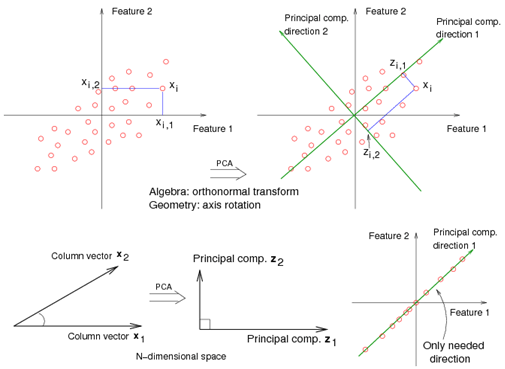

### Ejemplos

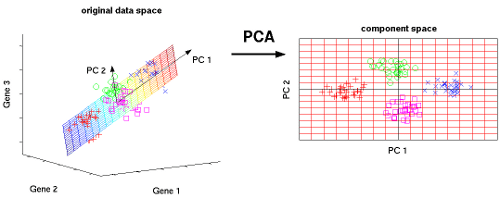

## Cargar versión pequeña de mnist

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

In [ ]:
X, y = digits.data, digits.target
n_samples, n_features = X.shape

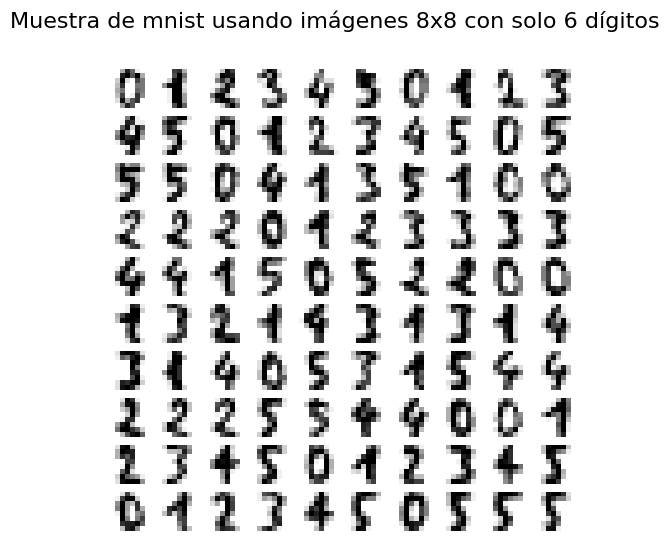

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Muestra de mnist usando imágenes 8x8 con solo 6 dígitos", fontsize=16)

## Mnist con todos los elementos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

## Transformar dataset con PCA

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform the data into the reduced dimension
X_pca = pca.fit_transform(X)

In [ ]:
X.shape

(1083, 64)

Text(0, 0.5, 'Feature 2')

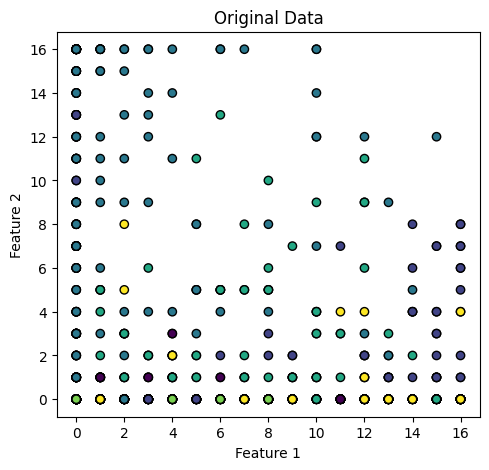

In [ ]:
# Create a scatter plot of the original dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 5], X[:, 62], c=y, cmap='viridis', edgecolor='k')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

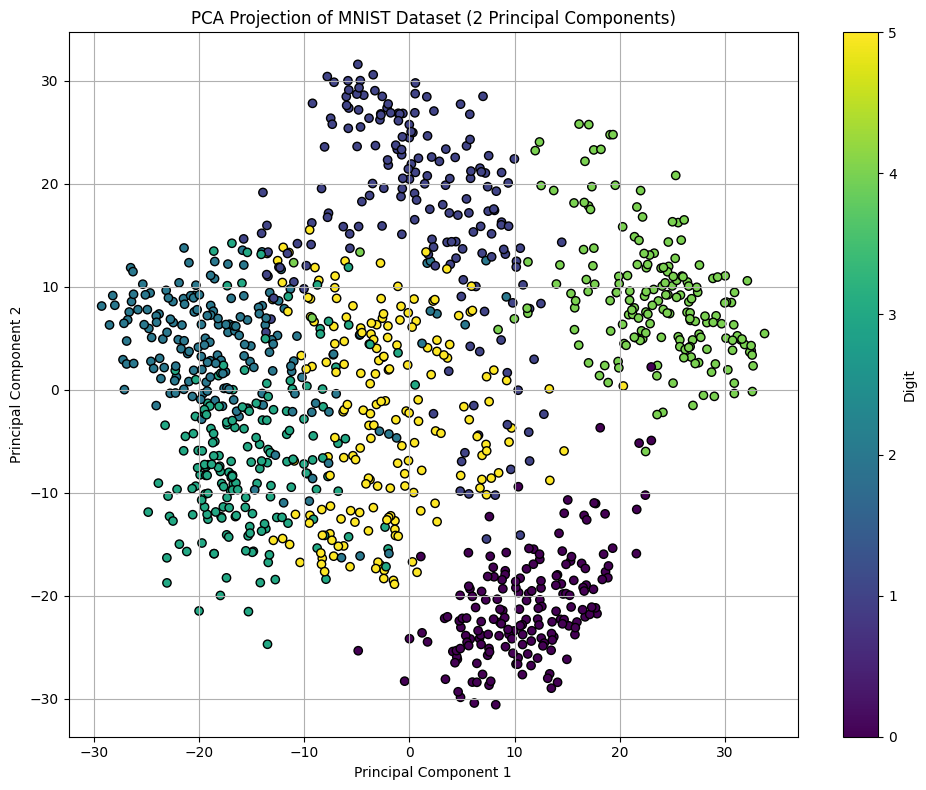

In [ ]:
# Create a scatter plot of the data in the space of the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(label='Digit')
plt.title('PCA Projection of MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


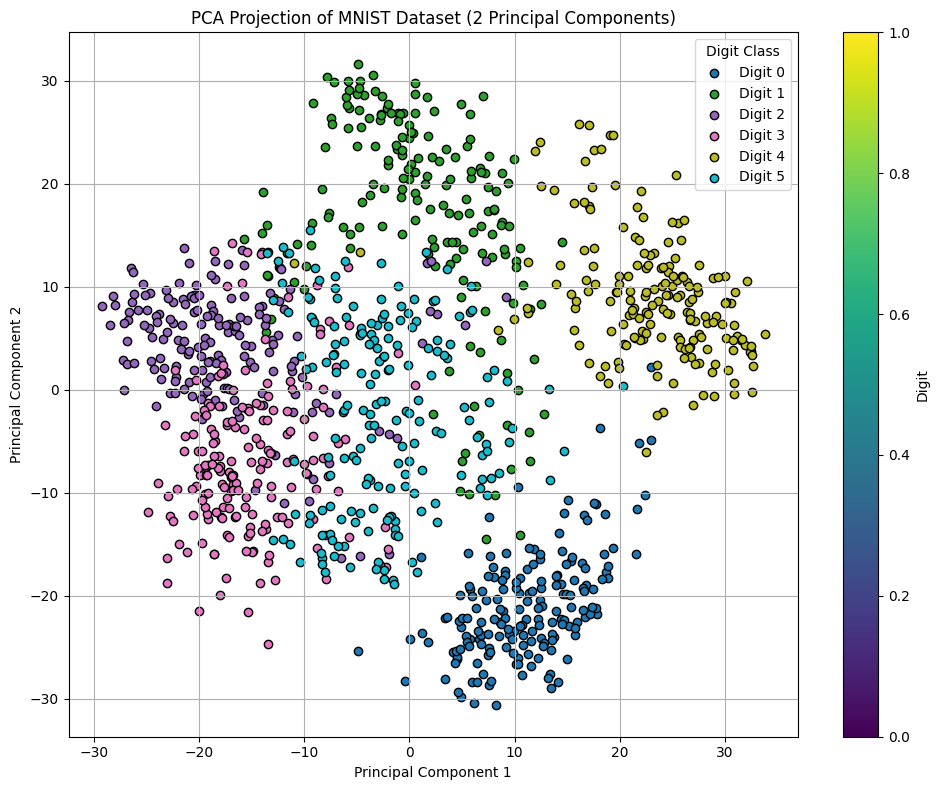

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=(10, 8))
unique_digits = np.unique(y)
# Use plt.get_cmap instead of cm.get_cmap
colors = plt.get_cmap('tab10', len(unique_digits))
for digit in unique_digits:
    mask = (y == digit)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=colors(digit), label=f'Digit {digit}', edgecolor='k')

plt.colorbar(label='Digit')
plt.title('PCA Projection of MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit Class')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

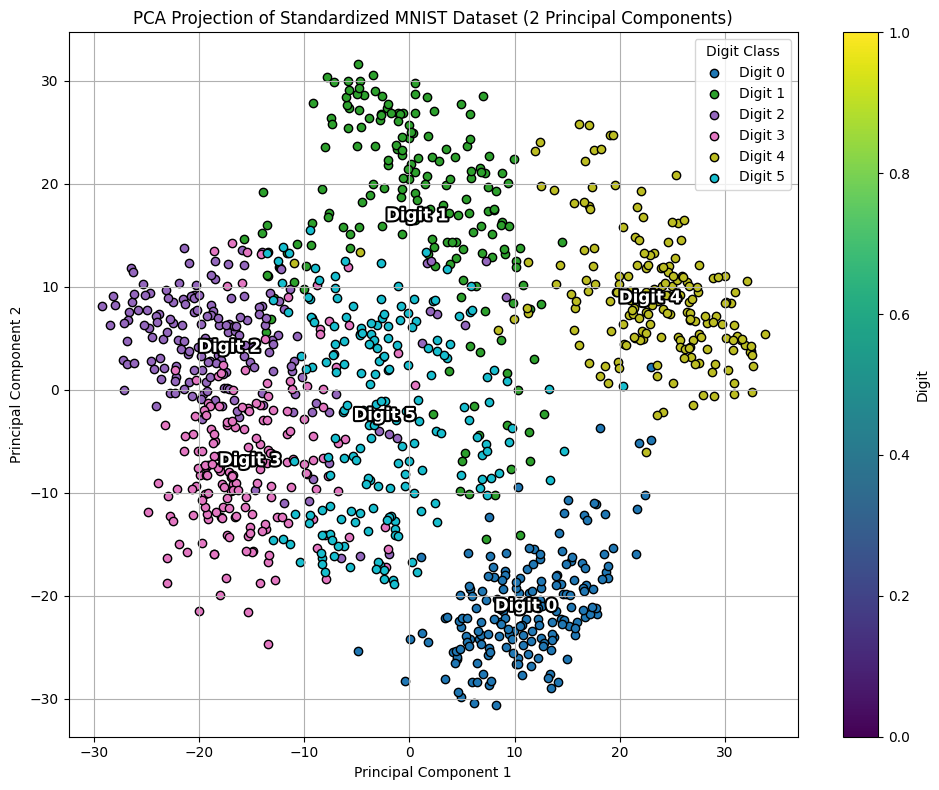

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patheffects import withStroke

plt.figure(figsize=(10, 8))
unique_digits = np.unique(y)
colors = plt.get_cmap('tab10', len(unique_digits))
for digit in unique_digits:
    mask = (y == digit)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=colors(digit), label=f'Digit {digit}', edgecolor='k')

    centroid = np.mean(X_pca[mask], axis=0)

    bbox = patches.FancyBboxPatch((centroid[0] - 0.2, centroid[1] - 0.2), 0.4, 0.4,
                                  boxstyle="round,pad=0.3", ec="none", lw=2,
                                  fc=colors(digit, alpha=0.7))
    plt.gca().add_patch(bbox)

    plt.text(centroid[0], centroid[1], f'Digit {digit}',
             fontsize=12, color='white', ha='center', va='center', weight='bold',
             path_effects=[withStroke(linewidth=3, foreground='black')])

plt.colorbar(label='Digit')
plt.title('PCA Projection of Standardized MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.legend(title='Digit Class')
plt.show()

## Usando SignMNIST

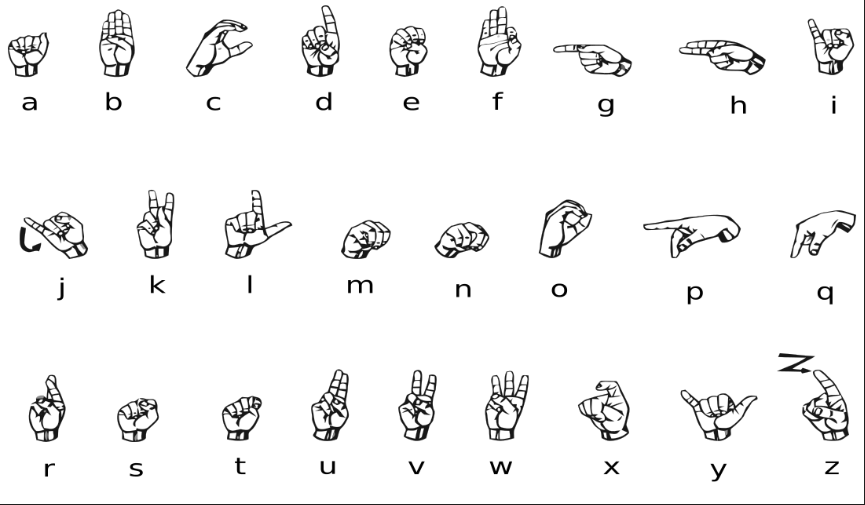![]("images/asl.png)

In [ ]:
valid_df = pd.read_csv("sign_mnist_test.csv")
valid_df = valid_df.dropna()
y = valid_df.pop('label')

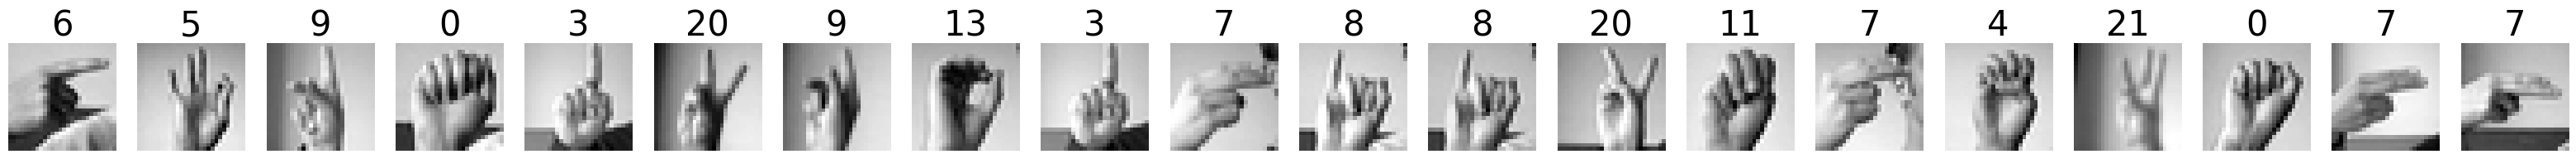

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = valid_df.values[i]
    label = y[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()
df_normalized = pd.DataFrame(
    std_scaler.fit_transform(valid_df),
    columns=valid_df.columns,
    index=valid_df.index
)
X_sign_pca = pca.fit_transform(df_normalized.values)

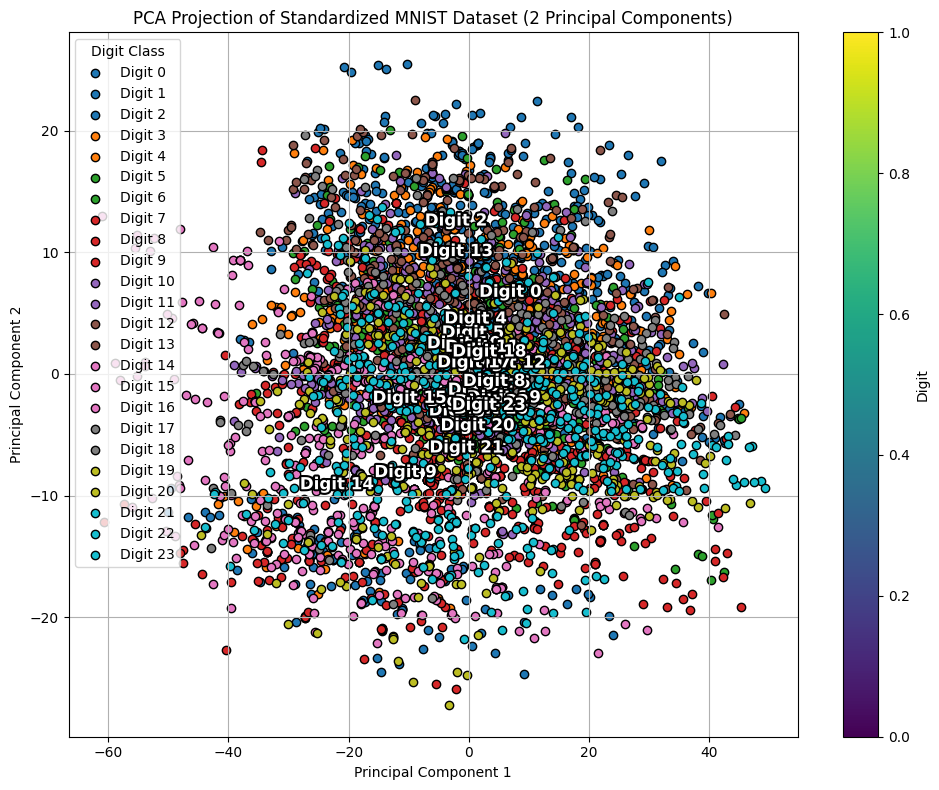

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patheffects import withStroke

plt.figure(figsize=(10, 8))
unique_digits = np.unique(y)
colors = plt.get_cmap('tab10', len(unique_digits))
for digit in unique_digits:
    mask = (y == digit)
    plt.scatter(X_sign_pca[mask, 0], X_sign_pca[mask, 1], color=colors(digit), label=f'Digit {digit}', edgecolor='k')

    centroid = np.mean(X_sign_pca[mask], axis=0)

    bbox = patches.FancyBboxPatch((centroid[0] - 0.2, centroid[1] - 0.2), 0.4, 0.4,
                                  boxstyle="round,pad=0.3", ec="none", lw=2,
                                  fc=colors(digit, alpha=0.7))
    plt.gca().add_patch(bbox)

    plt.text(centroid[0], centroid[1], f'Digit {digit}',
             fontsize=12, color='white', ha='center', va='center', weight='bold',
             path_effects=[withStroke(linewidth=3, foreground='black')])

plt.colorbar(label='Digit')
plt.title('PCA Projection of Standardized MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.legend(title='Digit Class')
plt.show()

# **t-SNE**

## Divergencia de Kullback-Leibler (KL)

La **divergencia de Kullback-Leibler (KL)** es una medida de disimilitud entre dos distribuciones de probabilidad. Para dos distribuciones de probabilidad $P$ y $Q$, la divergencia KL se define como:

$$
D_{KL}(P || Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

o en su forma continua:

$$
D_{KL}(P || Q) = \int p(x) \log \frac{p(x)}{q(x)} \, dx
$$

Esta medida no es simétrica y no es una verdadera distancia, pero es útil en aplicaciones donde queremos medir cuánta información se pierde al aproximar $P$ con $Q$.


## **t-SNE**

El **t-SNE (t-Distributed Stochastic Neighbor Embedding)** es un método de reducción de dimensionalidad utilizado para visualizar datos en espacios de menor dimensión, preservando las relaciones de proximidad entre los puntos en el espacio original.

## Paso 1: Construcción de la distribución de probabilidad en el espacio de alta dimensión

Para cada par de puntos $x_i$ y $x_j$ en el espacio de alta dimensión, definimos la probabilidad condicional de que $x_j$ sea un vecino de $x_i$ como:

$$
p_{j|i} = \frac{\exp(-\| x_i - x_j \|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\| x_i - x_k \|^2 / 2\sigma_i^2)}
$$

Luego, definimos la probabilidad simétrica:

$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}
$$

donde $n$ es el número total de puntos.

## Paso 2: Construcción de la distribución de probabilidad en el espacio de baja dimensión

En el espacio de baja dimensión, utilizamos una distribución de Student-t con un grado de libertad para calcular la similitud entre los puntos $y_i$ y $y_j$:

$$
q_{ij} = \frac{(1 + \| y_i - y_j \|^2)^{-1}}{\sum_{k \neq l} (1 + \| y_k - y_l \|^2)^{-1}}
$$

## Paso 3: Minimización de la divergencia KL

La idea central de t-SNE es minimizar la divergencia de Kullback-Leibler entre las distribuciones $P$ y $Q$, de manera que la estructura de proximidad de los datos en el espacio original se preserve en el espacio reducido:

$$
C = D_{KL}(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$





## Problema de Minimización en t-SNE

### Función de Costo

El objetivo de t-SNE es minimizar la siguiente función de costo:

$$
C = D_{KL}(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

donde:

- $p_{ij}$ es la probabilidad de similitud entre los puntos $x_i$ y $x_j$ en el espacio de alta dimensión:

  $$
  p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}
  $$

- $q_{ij}$ es la probabilidad de similitud entre los puntos $y_i$ y $y_j$ en el espacio de baja dimensión, modelada mediante una distribución de **Student-t** con 1 grado de libertad:

  $$
  q_{ij} = \frac{(1 + \| y_i - y_j \|^2)^{-1}}{\sum_{k \neq l} (1 + \| y_k - y_l \|^2)^{-1}}
  $$

### Optimización con el descenso del gradiente

Para encontrar la representación óptima en el espacio de menor dimensión, se usa **gradiente descendente** para actualizar los valores de $y_i$. El gradiente de la función de costo respecto a $y_i$ está dado por:

$$
\frac{\partial C}{\partial y_i} = 4 \sum_{j \neq i} (p_{ij} - q_{ij}) (y_i - y_j) (1 + \| y_i - y_j \|^2)^{-1}
$$

Esta actualización mueve los puntos en el espacio reducido de tal manera que las similitudes entre los puntos se preserven lo mejor posible.

## Resumen

El problema de minimización en t-SNE se formula como:

$$
\min_{Y} \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

donde el conjunto de puntos $Y = \{ y_1, y_2, \dots, y_n \}$ es la representación en el espacio reducido. La optimización se realiza mediante **descenso del gradiente** con **momentum** y un ajuste adaptativo del aprendizaje para evitar trampas en óptimos locales.


# Referencias

- van der Maaten, L., & Hinton, G. (2008). "Visualizing Data using t-SNE". Journal of Machine Learning Research.


circles, perplexity=5 in 0.35 sec
circles, perplexity=30 in 1.1 sec
circles, perplexity=50 in 0.79 sec
circles, perplexity=100 in 1.6 sec
S-curve, perplexity=5 in 0.72 sec
S-curve, perplexity=30 in 1.2 sec
S-curve, perplexity=50 in 1.5 sec
S-curve, perplexity=100 in 1.8 sec
uniform grid, perplexity=5 in 0.81 sec
uniform grid, perplexity=30 in 1.3 sec
uniform grid, perplexity=50 in 0.91 sec
uniform grid, perplexity=100 in 0.99 sec


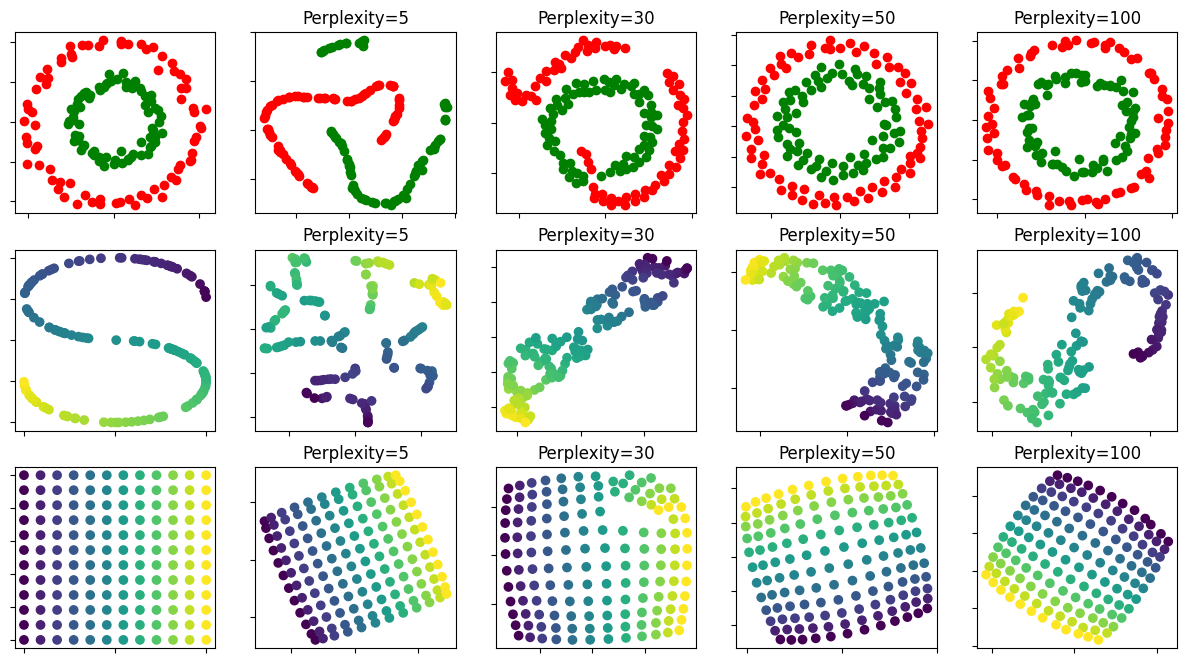

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

# Comparando con PCA

Loading MNIST dataset...
Preprocessing data...
Running t-SNE with perplexity=5...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for perplexity 5: 24.77 seconds
Running t-SNE with perplexity=30...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for perplexity 30: 30.13 seconds
Running t-SNE with perplexity=50...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for perplexity 50: 33.63 seconds
Running t-SNE with perplexity=100...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for perplexity 100: 59.25 seconds


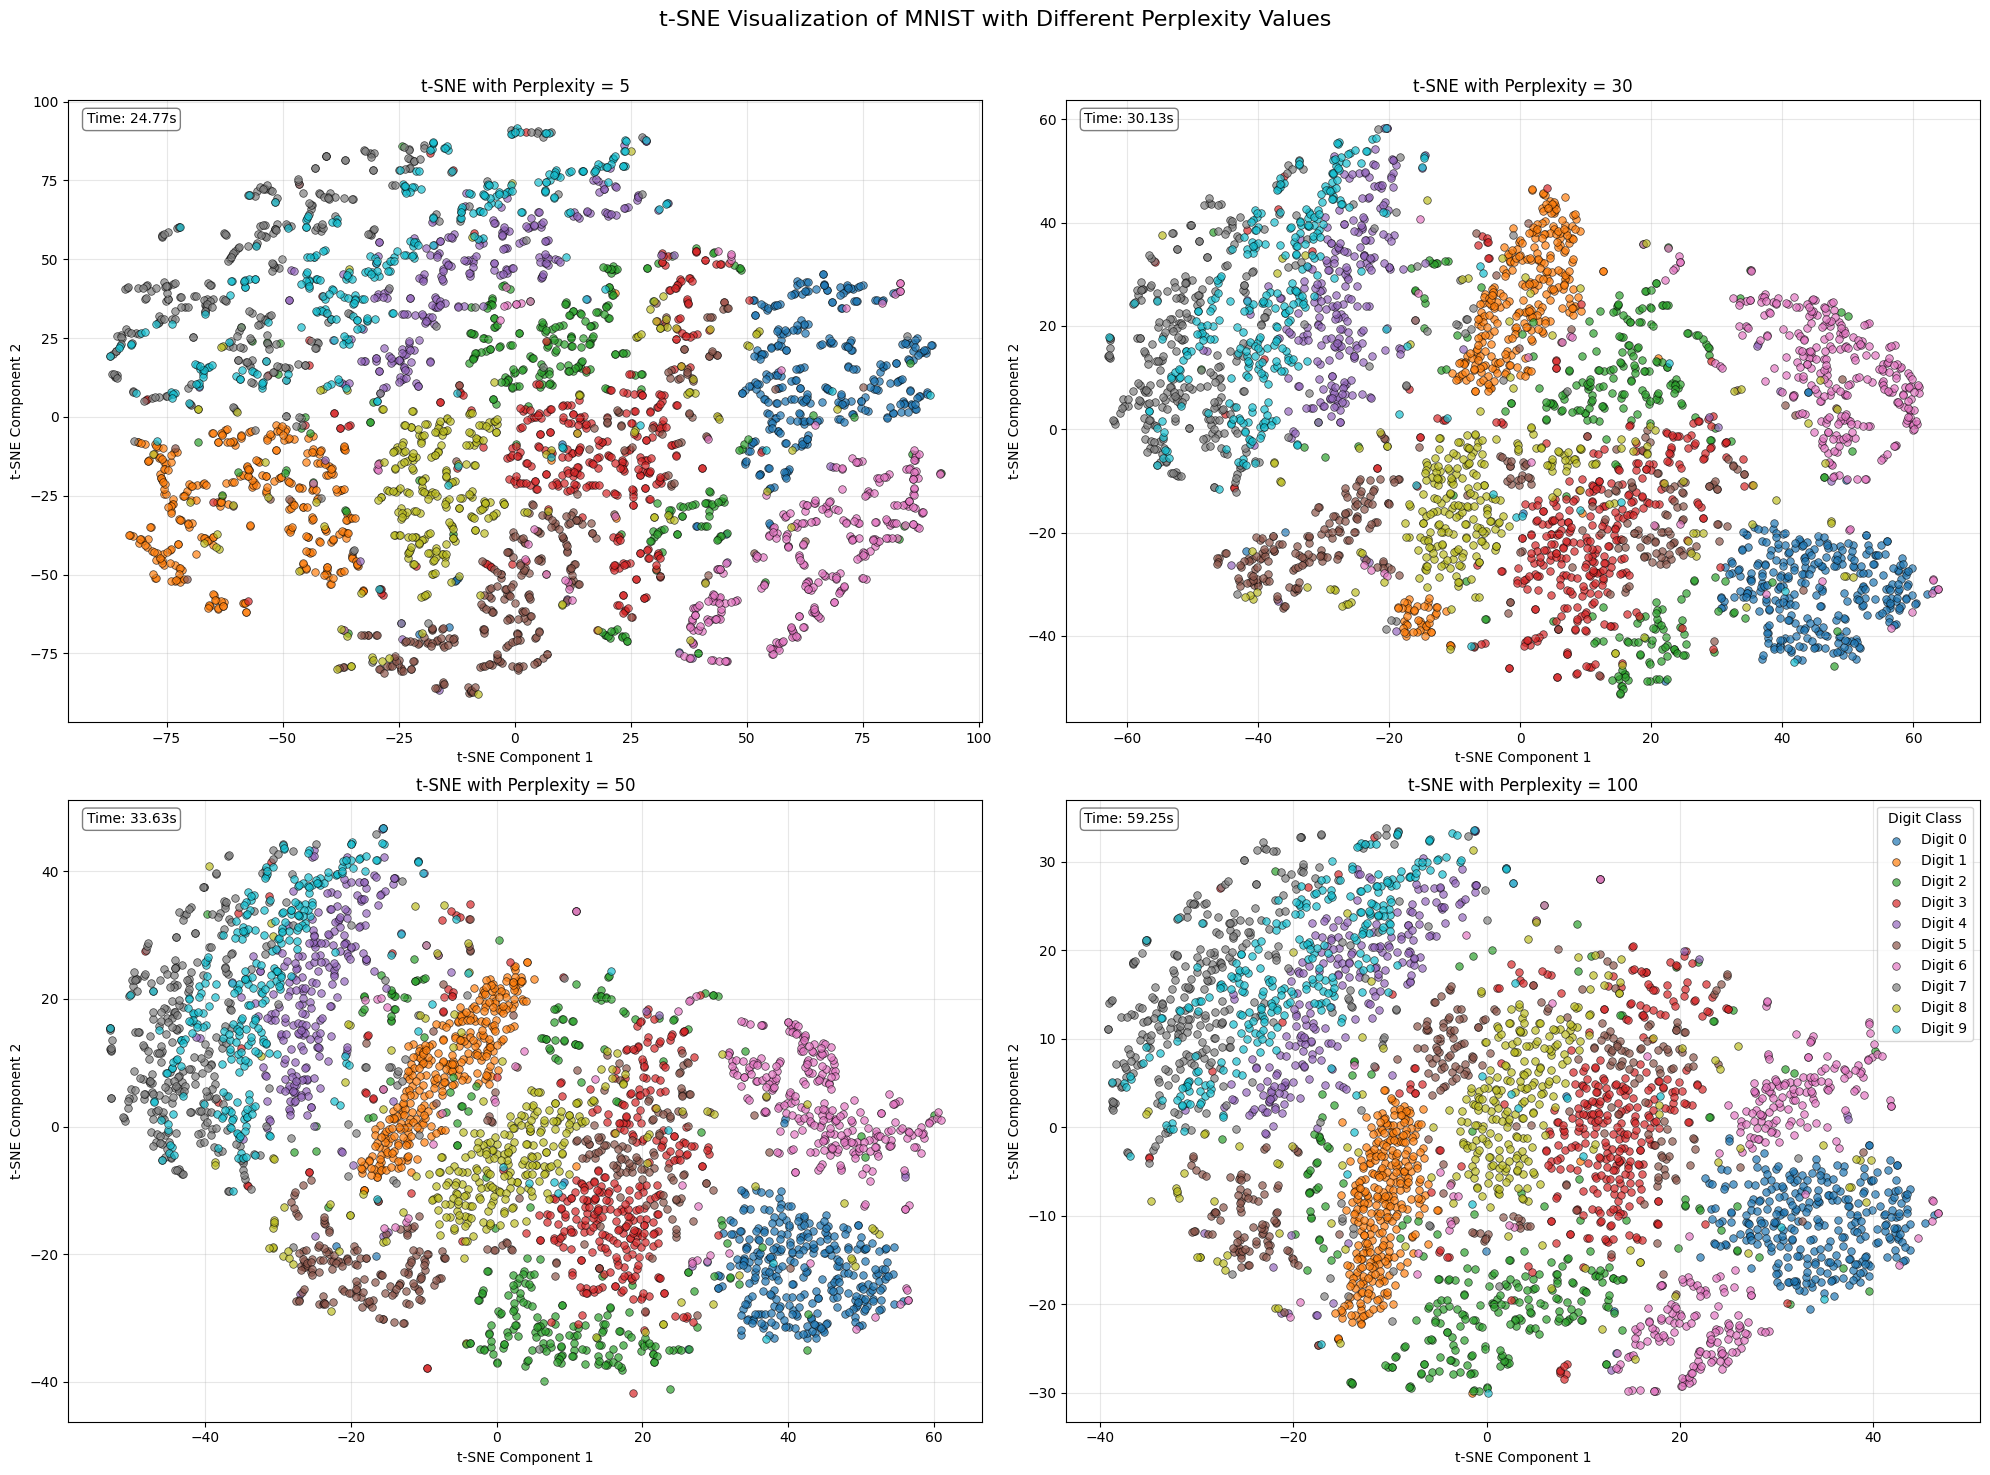

Running PCA for comparison...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



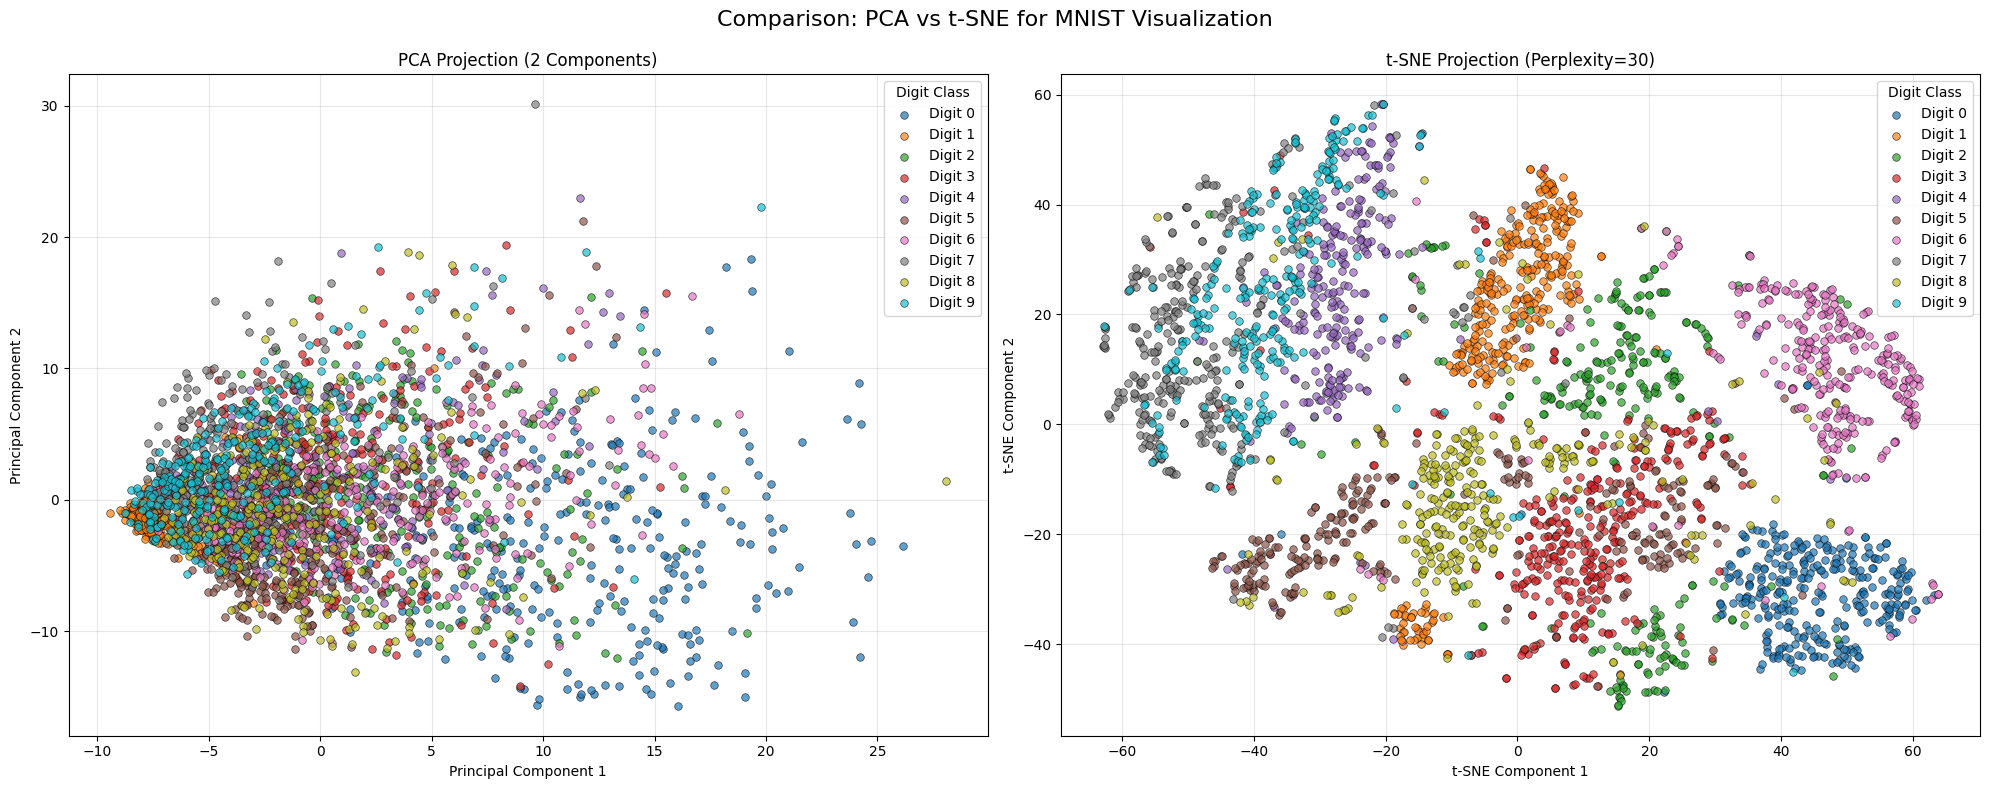

Visualizing the effect of iterations...
Running t-SNE with n_iter=250...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for 250 iterations: 7.91 seconds
Running t-SNE with n_iter=500...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for 500 iterations: 15.67 seconds
Running t-SNE with n_iter=1000...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for 1000 iterations: 29.26 seconds
Running t-SNE with n_iter=2000...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Time elapsed for 2000 iterations: 58.57 seconds


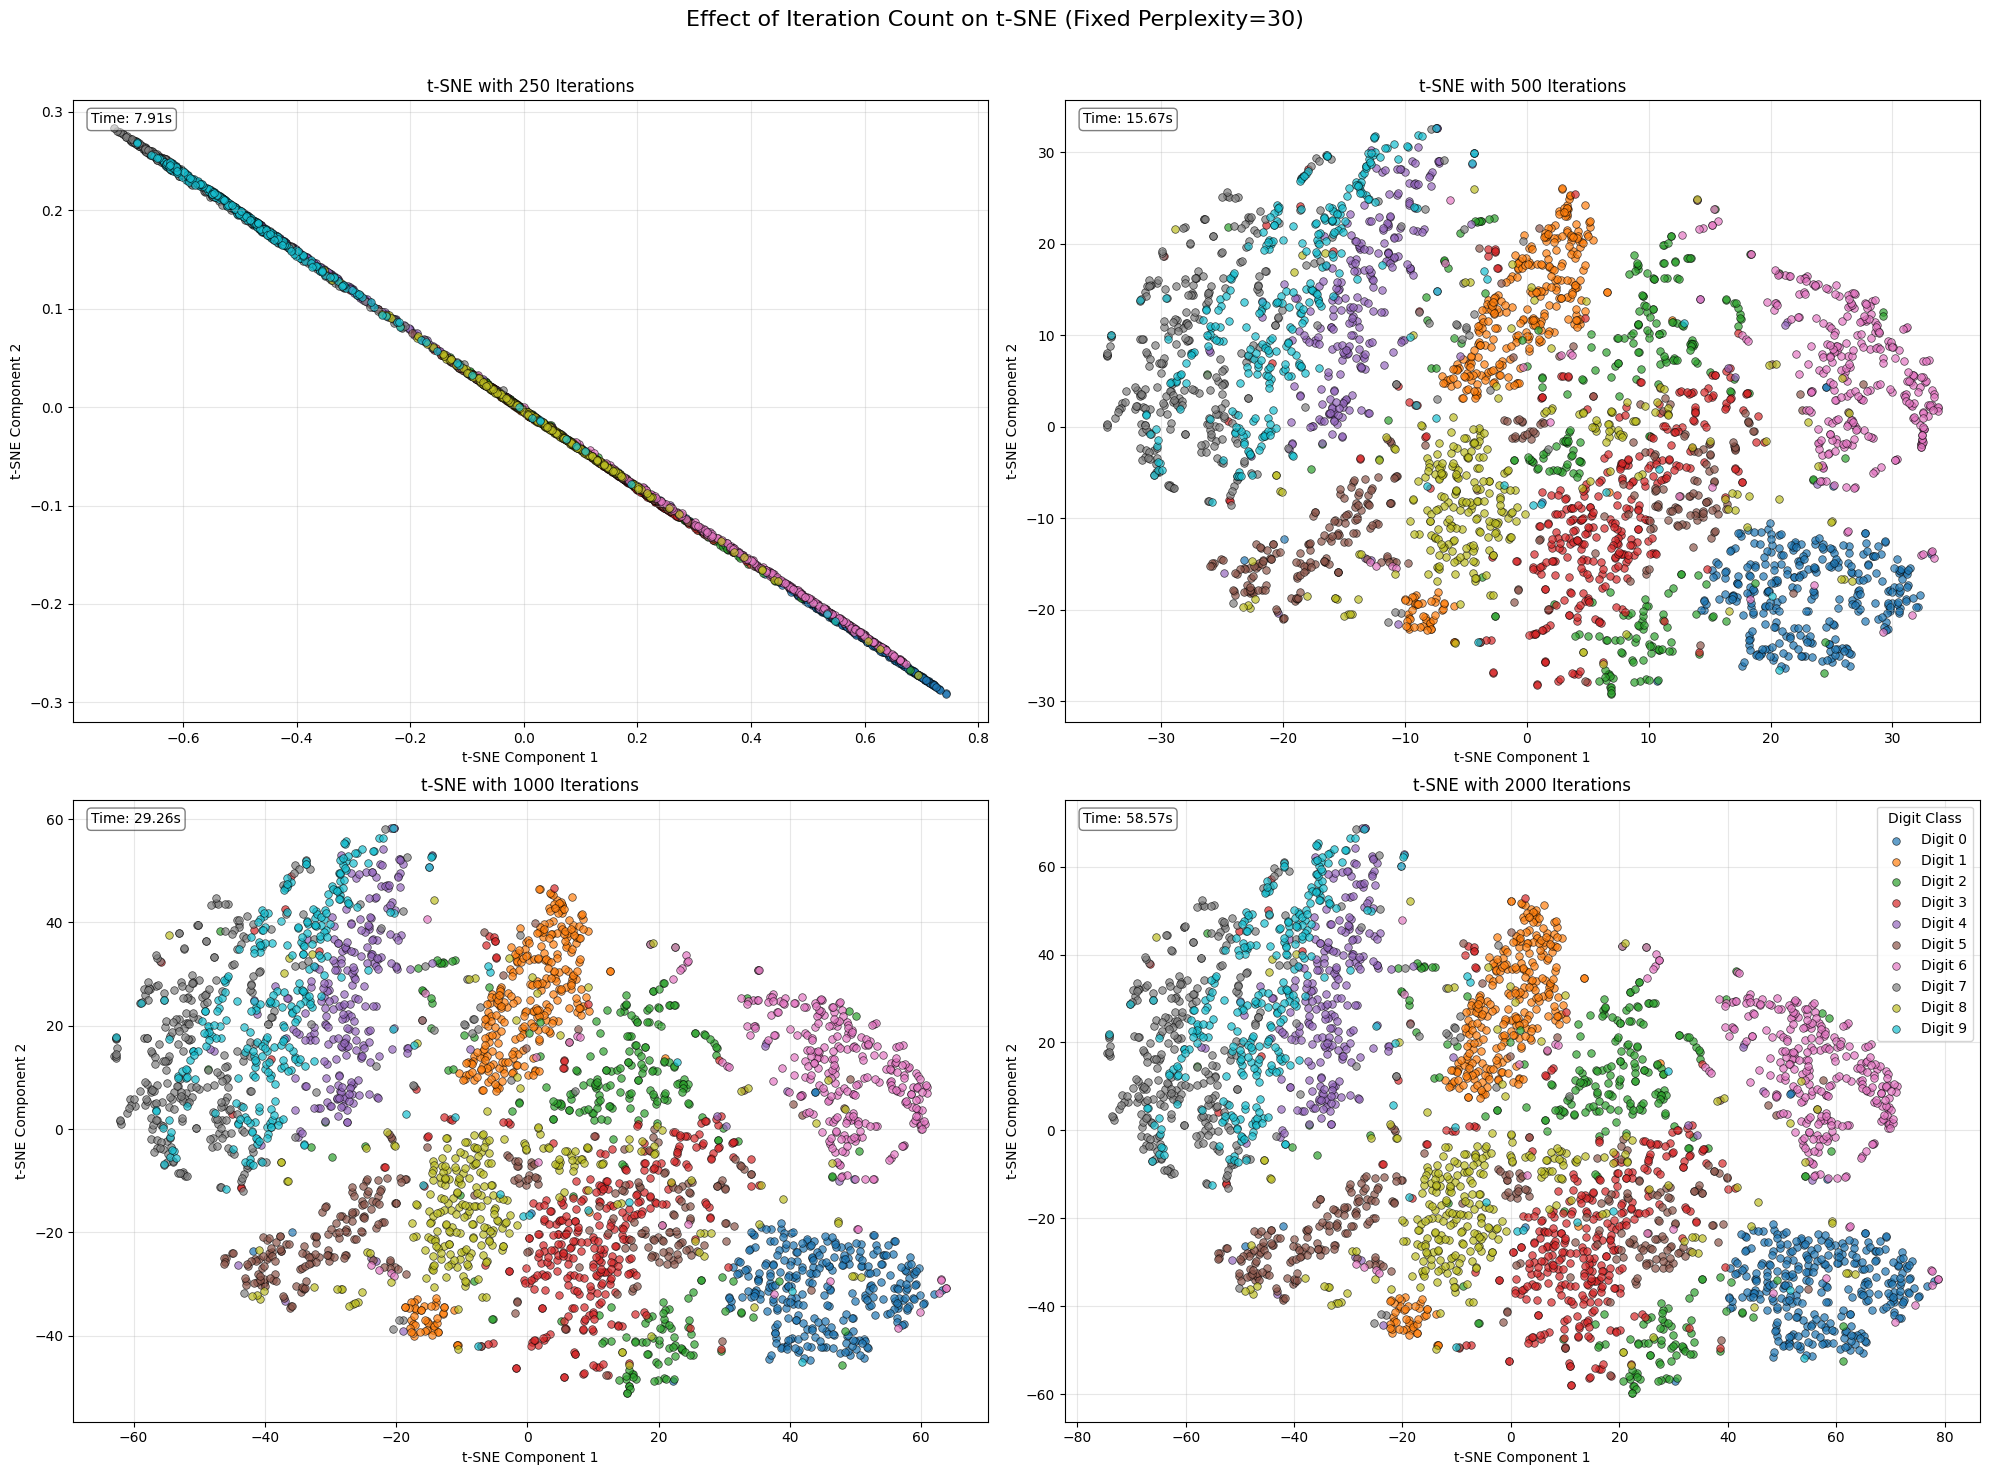

t-SNE exploration complete!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import time

# Load MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype('float32')
y = y.astype('int')

# Convert y to integers
y = y.astype(int)

# Take a subset for faster computation
n_samples = 3000
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(len(X))[:n_samples]
X_subset = X.iloc[indices].values if hasattr(X, 'iloc') else X[indices]
y_subset = y.iloc[indices].values if hasattr(y, 'iloc') else y[indices]

# Preprocessing: scale the data
print("Preprocessing data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50, 100]
plt.figure(figsize=(20, 15))

for i, perplexity in enumerate(perplexities):
    print(f"Running t-SNE with perplexity={perplexity}...")
    start_time = time.time()

    # Apply t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        n_iter=1000,
        learning_rate='auto',
        random_state=42
    )
    X_tsne = tsne.fit_transform(X_scaled)

    elapsed_time = time.time() - start_time
    print(f"Time elapsed for perplexity {perplexity}: {elapsed_time:.2f} seconds")

    # Plot the results
    plt.subplot(2, 2, i + 1)
    unique_digits = np.unique(y_subset)
    colors = plt.get_cmap('tab10', len(unique_digits))

    for digit in unique_digits:
        mask = (y_subset == digit)
        plt.scatter(
            X_tsne[mask, 0], X_tsne[mask, 1],
            color=colors(digit),
            label=f'Digit {digit}',
            alpha=0.7,
            s=30,
            edgecolor='k',
            linewidth=0.5
        )

    plt.title(f't-SNE with Perplexity = {perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, alpha=0.3)

    # Only add legend to the last plot to save space
    if i == len(perplexities) - 1:
        plt.legend(title='Digit Class', loc='best')

    # Add timing information to the plot
    plt.text(
        0.02, 0.98,
        f'Time: {elapsed_time:.2f}s',
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )

plt.suptitle('t-SNE Visualization of MNIST with Different Perplexity Values', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the suptitle
plt.show()

# Let's also compare t-SNE with PCA for reference
print("Running PCA for comparison...")
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create comparison plot - PCA vs t-SNE
plt.figure(figsize=(20, 8))

# Plot PCA
plt.subplot(1, 2, 1)
for digit in unique_digits:
    mask = (y_subset == digit)
    plt.scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        color=colors(digit),
        label=f'Digit {digit}',
        alpha=0.7,
        s=30,
        edgecolor='k',
        linewidth=0.5
    )

plt.title('PCA Projection (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend(title='Digit Class', loc='best')

# Plot t-SNE with best perplexity
plt.subplot(1, 2, 2)
tsne_best = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, learning_rate='auto')
X_tsne_best = tsne_best.fit_transform(X_scaled)

for digit in unique_digits:
    mask = (y_subset == digit)
    plt.scatter(
        X_tsne_best[mask, 0], X_tsne_best[mask, 1],
        color=colors(digit),
        label=f'Digit {digit}',
        alpha=0.7,
        s=30,
        edgecolor='k',
        linewidth=0.5
    )

plt.title('t-SNE Projection (Perplexity=30)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)
plt.legend(title='Digit Class', loc='best')

plt.suptitle('Comparison: PCA vs t-SNE for MNIST Visualization', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# Add a visualization showing the effect of n_iter (number of iterations)
print("Visualizing the effect of iterations...")
n_iters = [250, 500, 1000, 2000]
plt.figure(figsize=(20, 15))

for i, n_iter in enumerate(n_iters):
    print(f"Running t-SNE with n_iter={n_iter}...")
    start_time = time.time()

    # Apply t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=30,  # Fixed perplexity
        n_iter=n_iter,
        learning_rate='auto',
        random_state=42
    )
    X_tsne = tsne.fit_transform(X_scaled)

    elapsed_time = time.time() - start_time
    print(f"Time elapsed for {n_iter} iterations: {elapsed_time:.2f} seconds")

    # Plot the results
    plt.subplot(2, 2, i + 1)

    for digit in unique_digits:
        mask = (y_subset == digit)
        plt.scatter(
            X_tsne[mask, 0], X_tsne[mask, 1],
            color=colors(digit),
            label=f'Digit {digit}',
            alpha=0.7,
            s=30,
            edgecolor='k',
            linewidth=0.5
        )

    plt.title(f't-SNE with {n_iter} Iterations')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, alpha=0.3)

    # Only add legend to the last plot to save space
    if i == len(n_iters) - 1:
        plt.legend(title='Digit Class', loc='best')

    # Add timing information to the plot
    plt.text(
        0.02, 0.98,
        f'Time: {elapsed_time:.2f}s',
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )

plt.suptitle('Effect of Iteration Count on t-SNE (Fixed Perplexity=30)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the suptitle
plt.show()

print("t-SNE exploration complete!")


# Aplicación en Medicina

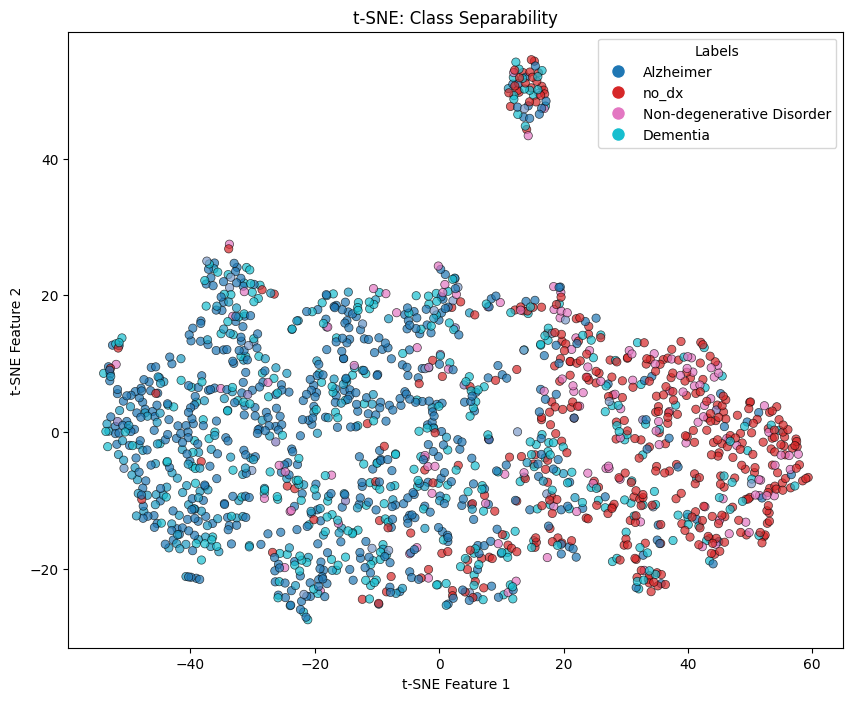

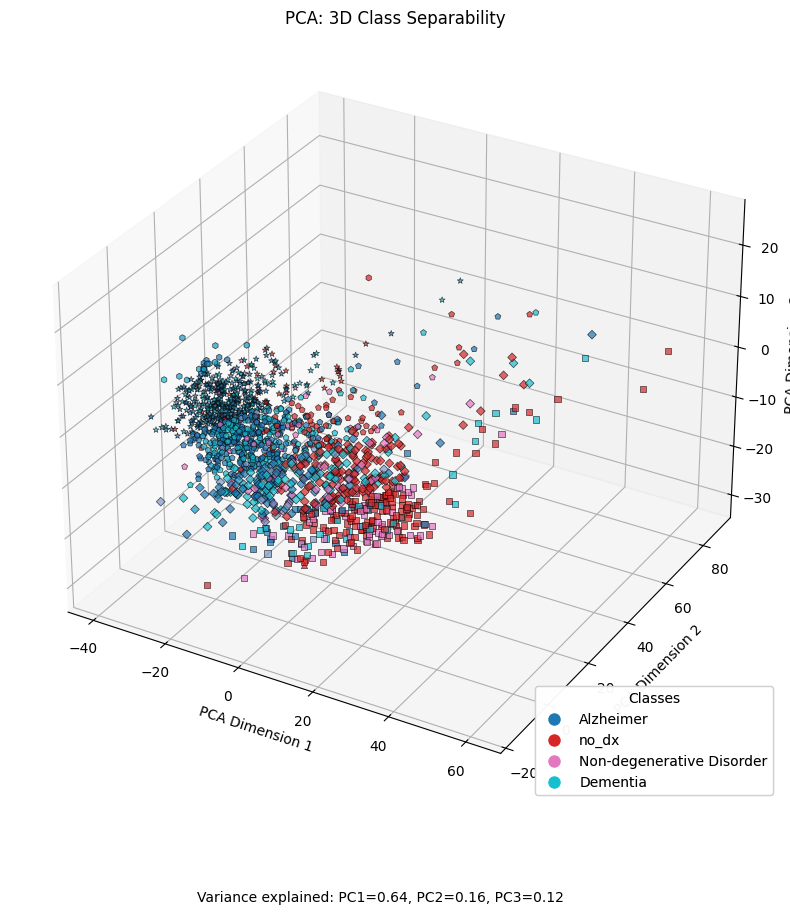